In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Confusion Matrix

In [ ]:
cm1 = np.load("improvement_entropyConf_datagen2/cm1_entropyConf_all.npy", allow_pickle=True)
cm2 = np.load("improvement_entropyConf_datagen2/cm2_entropyConf_all.npy", allow_pickle=True)
cm3 = np.load("improvement_entropyConf_datagen2/cm3_entropyConf_all.npy", allow_pickle=True)
cm4 = np.load("improvement_entropyConf_datagen2/cm4_entropyConf_all.npy", allow_pickle=True)
cm5 = np.load("improvement_entropyConf_datagen2/cm5_entropyConf_all.npy", allow_pickle=True)

cm90 = np.load("improvement_entropyConf_datagen2/cm90_entropyConf_all.npy", allow_pickle=True)
cm95 = np.load("improvement_entropyConf_datagen2/cm95_entropyConf_all.npy", allow_pickle=True)
cm100 = np.load("improvement_entropyConf_datagen2/cm100_entropyConf_all.npy", allow_pickle=True)

cm1_nevd = np.load("improvement_nEVD_datagen2/confusion_matrices_alphavar_all_experiments.npy", allow_pickle=True)

In [ ]:
cm1

In [ ]:
temp_list = []

for i in cm1:
    temp_dict = {}
    temp_dict[1] = i[1]
    temp_dict[2] = i[2]
    temp_dict[3] = i[3]
    temp_dict[5] = i[5]
    temp_dict[6] = i[6]
    temp_dict[7] = i[7]
    temp_dict[8] = i[8]
    temp_list.append(temp_dict)

In [ ]:
data1 = cm1_nevd
data2 = cm1

# #f2ebf5

def compute_f1(conf_matrix):
    """
    Compute the F1 score from a confusion matrix.
    The confusion matrix is assumed to be in the form: [[TP, FP], [FN, TN]].
    """
    TP, FP = conf_matrix[0]
    FN, TN = conf_matrix[1]
    
    # Calculate precision and recall with safe division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # Compute F1-score with safe division
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

def compute_dataset_f1(data):
    """
    For a given dataset (an array of samples), compute the average F1 score and SEM per threshold.
    Returns:
      thresholds (sorted list of thresholds),
      avg_f1 (dictionary mapping threshold -> average F1 score),
      sem_f1 (dictionary mapping threshold -> SEM)
    """
    # Find all threshold keys present in the dataset.
    all_thresholds = set()
    for sample in data:
        all_thresholds.update(sample.keys())
    thresholds = sorted(all_thresholds)

    # Organize F1 scores for each threshold.
    f1_scores = {thr: [] for thr in thresholds}
    for sample in data:
        for thr in sample:
            f1_scores[thr].append(compute_f1(sample[thr]))

    # Compute average F1 and SEM for each threshold.
    avg_f1 = {}
    sem_f1 = {}
    for thr in thresholds:
        scores = np.array(f1_scores[thr])
        avg_f1[thr] = np.mean(scores)
        sem_f1[thr] = np.std(scores) / np.sqrt(len(scores))
    
    return thresholds, avg_f1, sem_f1

# Compute average F1 and SEM for each dataset.
thresholds1, avg_f1_data1, sem_f1_data1 = compute_dataset_f1(data1)
thresholds2, avg_f1_data2, sem_f1_data2 = compute_dataset_f1(data2)

# Determine the best threshold (highest average F1) for each dataset.
best_thr_data1 = max(avg_f1_data1, key=avg_f1_data1.get)
best_f1_data1 = avg_f1_data1[best_thr_data1]

best_thr_data2 = max(avg_f1_data2, key=avg_f1_data2.get)
best_f1_data2 = avg_f1_data2[best_thr_data2]

print("Dataset 1: Best threshold = {:.2f} with average F1 = {:.3f}".format(best_thr_data1, best_f1_data1))
print("Dataset 2: Best threshold = {:.2f} with average F1 = {:.3f}".format(best_thr_data2, best_f1_data2))

# Plot the average F1 scores with error bands for each dataset.
plt.figure(figsize=(10, 6))

# Plot data for dataset 1.
x1 = thresholds1
y1 = [avg_f1_data1[thr] for thr in x1]
y1_sem = [sem_f1_data1[thr] for thr in x1]
plt.plot(x1, y1, marker='o', linestyle='-', linewidth=4, markersize=8, label='Correction Feedback - nEVD')
plt.fill_between(x1, np.array(y1) - np.array(y1_sem), np.array(y1) + np.array(y1_sem),
                 color='blue', alpha=0.4)

# Plot data for dataset 2.
x2 = thresholds2
y2 = [avg_f1_data2[thr] for thr in x2]
y2_sem = [sem_f1_data2[thr] for thr in x2]
# Pairwise Comparison
plt.plot(x2, y2, marker='s', linestyle='--', linewidth=4, markersize=8, label='Correction Feedback - EntropyConf', color="#ff7f0e")
plt.fill_between(x2, np.array(y2) - np.array(y2_sem), np.array(y2) + np.array(y2_sem),
                 color="#ff7f0e", alpha=0.4)

#"#ff7f0e" orange
# '#8a39a4' purpuel

# Modify font sizes
plt.xlabel("Thresholds", fontsize=18)  # Increase x-label size
plt.ylabel("Average F1 Score", fontsize=18)  # Increase y-label size
plt.xticks(fontsize=16)  # Increase x-tick size
plt.yticks(fontsize=16)  # Increase y-tick size
plt.legend(fontsize=16)  # Increase legend size

plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("5_by_5_correction_feedback_f1_nEVD_Vs_entropyconf.jpeg", dpi=2000, bbox_inches='tight')
plt.show()

In [ ]:
def compute_f1(conf_matrix):
    """
    Compute the F1 score from a confusion matrix.
    The confusion matrix is assumed to be in the form: [[TN, FP], [FN, TP]].
    """
    TN, FP = conf_matrix[0]
    FN, TP = conf_matrix[1]
    # Calculate precision and recall with safe division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
    if precision + recall == 0:
        return 0
    return 2 * precision * recall / (precision + recall)


data = cm1_nevd

# Get the list of thresholds (assuming all samples have the same keys)
thresholds = sorted(data[0].keys())

# Organize F1 scores for each threshold across all samples.
f1_scores_by_threshold = {thr: [] for thr in thresholds}
for sample in data:
    for thr in thresholds:
        cm = sample[thr]  # confusion matrix for the given threshold
        f1_scores_by_threshold[thr].append(compute_f1(cm))

# Compute mean F1 and standard error for each threshold.
mean_f1 = []
sem_f1 = []  # standard error of the mean
for thr in thresholds:
    scores = np.array(f1_scores_by_threshold[thr])
    mean_f1.append(np.mean(scores))
    sem_f1.append(np.std(scores) / np.sqrt(len(scores)))

# Plot the results with fill_between for the SEM.
plt.figure(figsize=(8, 5))
plt.plot(thresholds, mean_f1, marker='o', linestyle='-', linewidth=2, markersize=6, label="Average F1 - EntropyConf")
lower_bound = np.array(mean_f1) - np.array(sem_f1)
upper_bound = np.array(mean_f1) + np.array(sem_f1)
plt.fill_between(thresholds, lower_bound, upper_bound, color='b', alpha=0.2, )
plt.xlabel("Threshold")
plt.ylabel("Average F1 Score")
#plt.title("Average F1 Scores per Threshold with SEM")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

## Visualizing nEVD

In [17]:
avar_bounds = np.load("toy_example_estop_nEVD_debuggedlogsum_changed_denominator/avar_bound_all_experiments.npy", allow_pickle=True)
true_avar_bounds = np.load("toy_example_estop_nEVD_debuggedlogsum_changed_denominator/true_avar_bounds_all_experiments.npy", allow_pickle=True)

data_99 = [i[0.99] for i in avar_bounds[:]]
data_95 = [i[0.95] for i in avar_bounds[:]]
data_90 = [i[0.90] for i in avar_bounds[:]]
data_85 = [i[0.85] for i in avar_bounds[:]]

true_avar = [i for i in true_avar_bounds[:]]
print(len(true_avar))

20


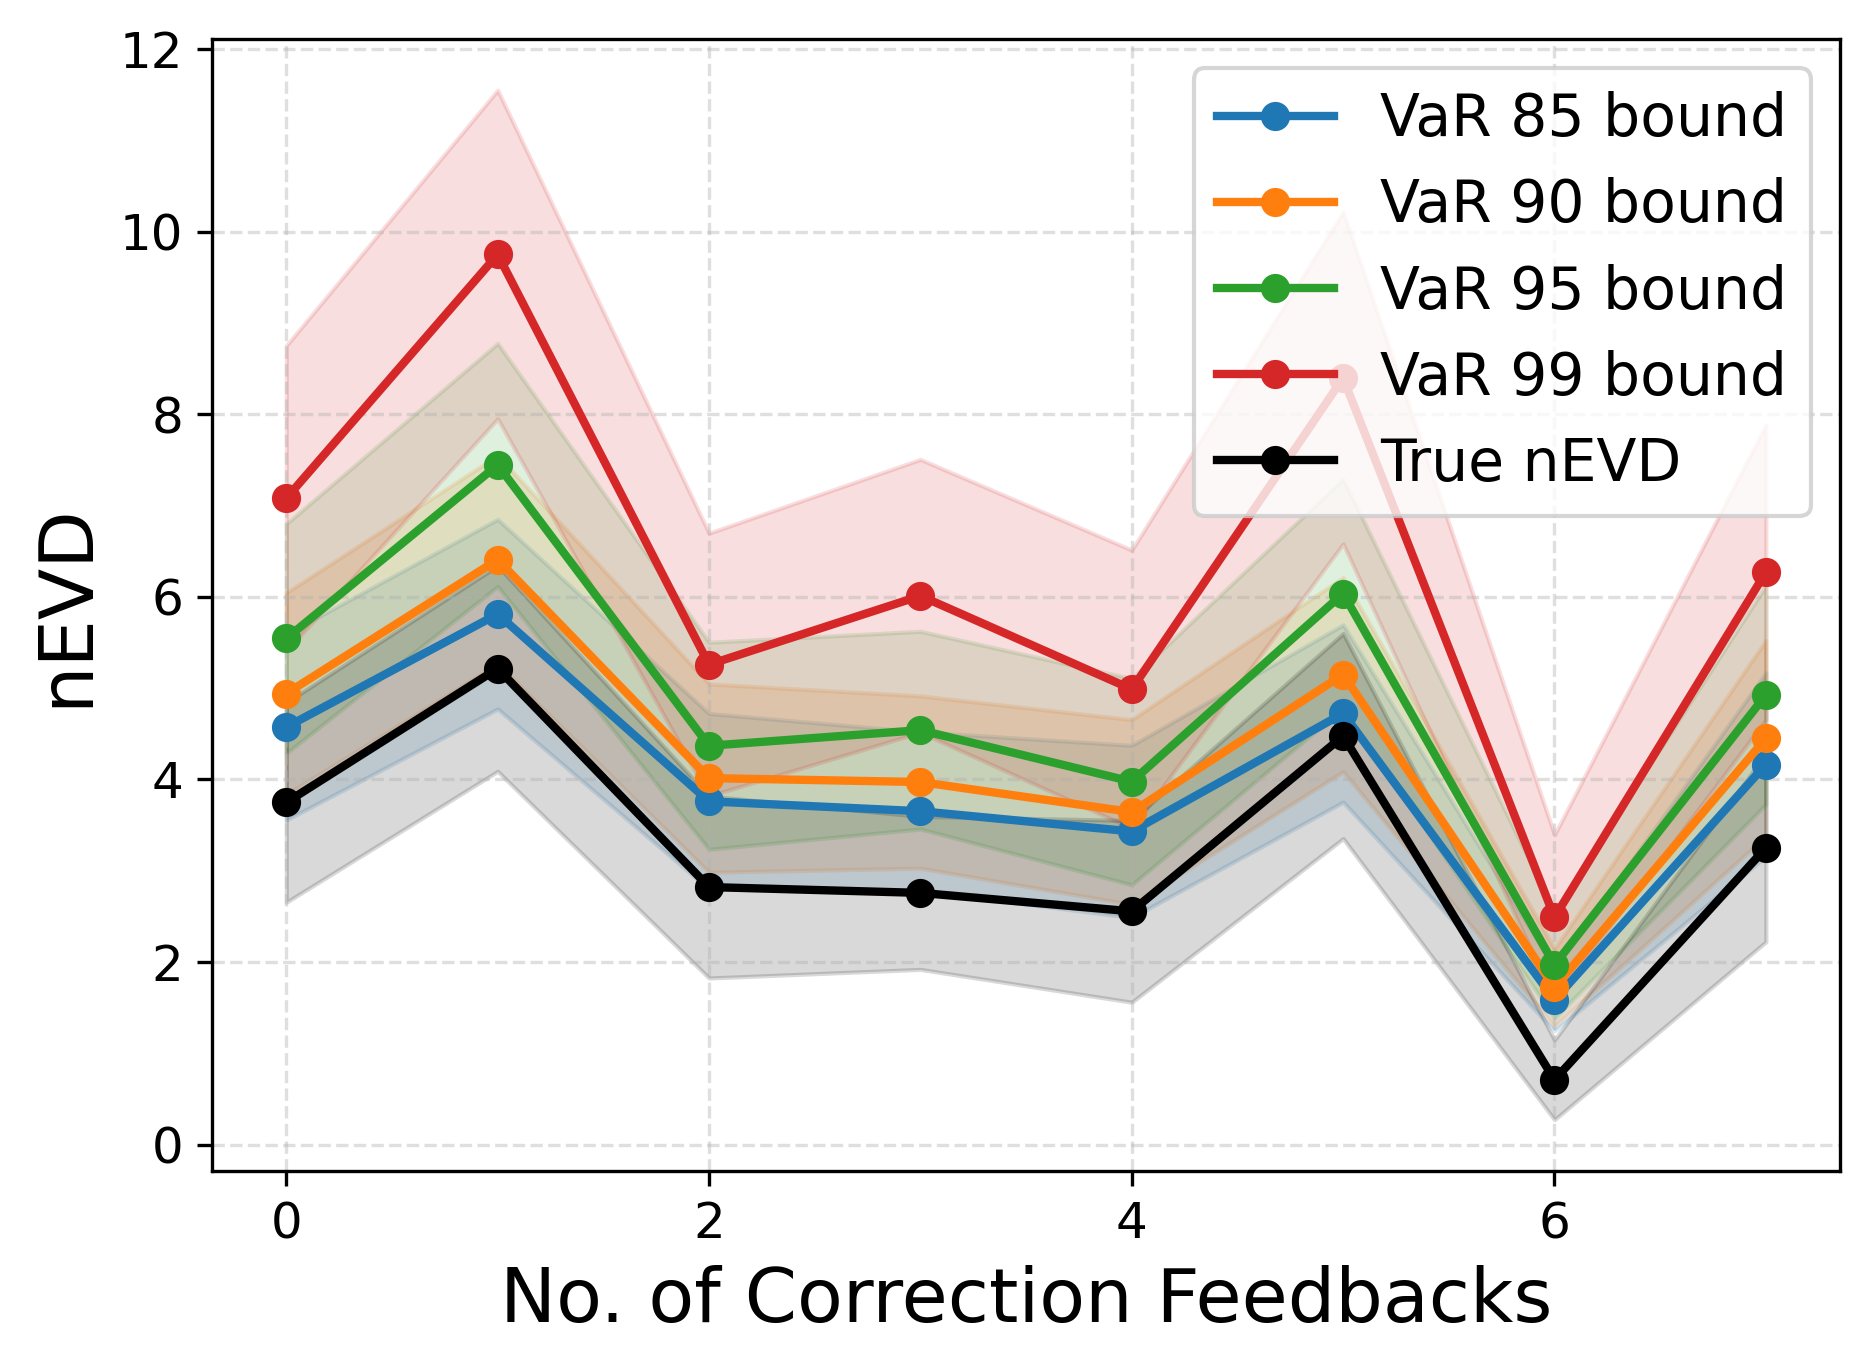

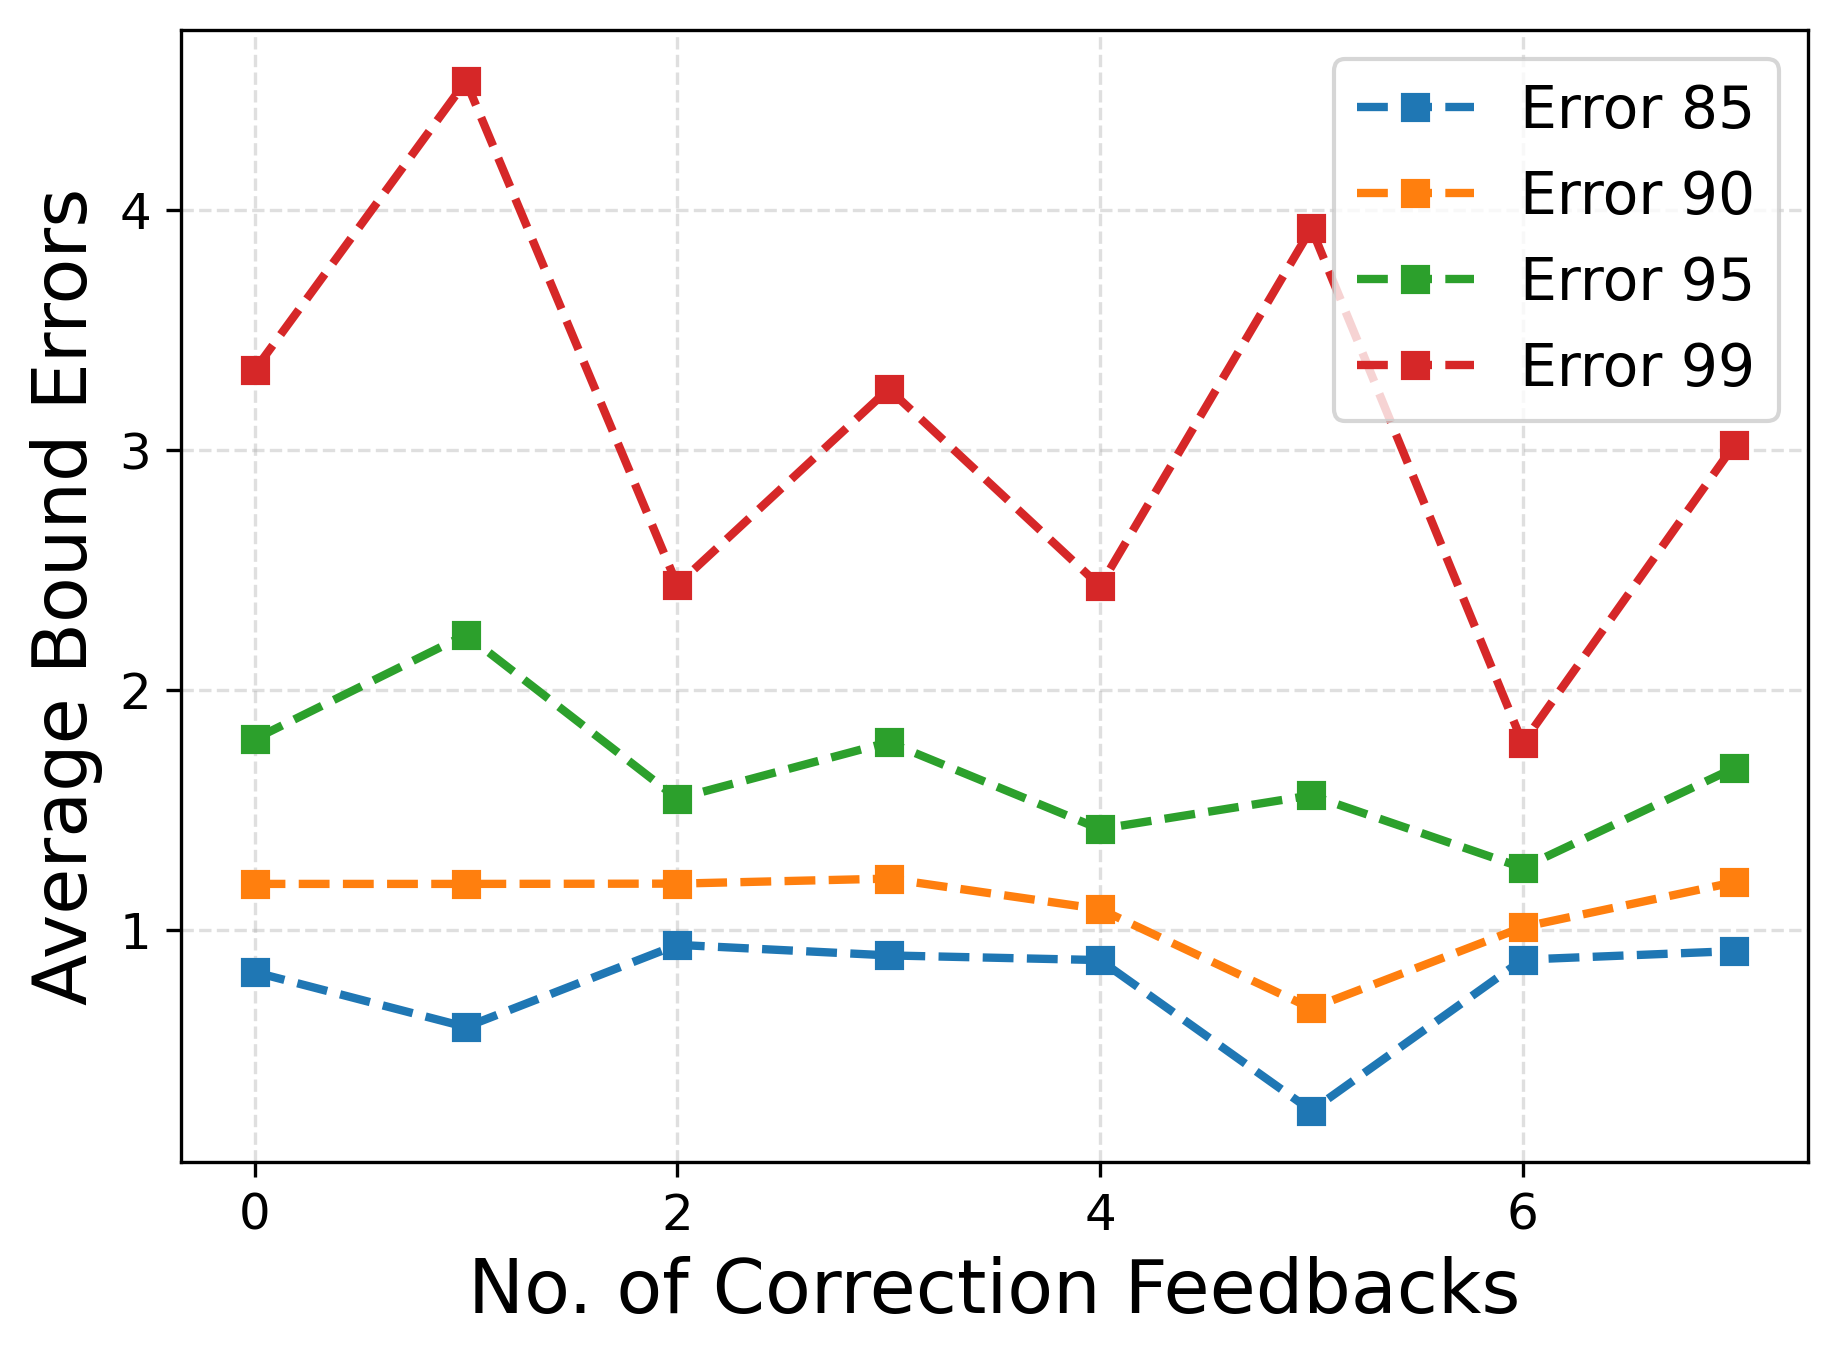

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define color scheme
colors = {
    "VaR 85 bound": "#1f77b4",  # Blue
    "VaR 90 bound": "#ff7f0e",  # Orange
    "VaR 95 bound": "#2ca02c",  # Green
    "VaR 99 bound": "#d62728",  # Red
    "True nEVD": "#000000",   # Black
    "Error 85": "#1f77b4",
    "Error 90": "#ff7f0e",
    "Error 95": "#2ca02c",
    "Error 99": "#d62728"
}

# Function to compute absolute errors
def compute_errors(var_means, true_means):
    return np.abs(np.array(var_means) - np.array(true_means))

# Function to compute means and standard errors
def compute_means_and_stds(data_by_key):
    means = [np.mean(data_by_key[key]) for key in data_by_key]
    stds = [np.std(data_by_key[key]) / np.sqrt(len(data_by_key[key])) for key in data_by_key]  # Compute SEM
    return means, stds

# Function to organize data by keys
def organize_data(data_list):
    organized_data = {i: [] for i in range(len(data_list[0]))}
    for entry in data_list:
        for key in entry:
            organized_data[key].append(entry[key][0])
    return organized_data

# Process all datasets
data_by_key_85 = organize_data(data_85)
data_by_key_90 = organize_data(data_90)
data_by_key_95 = organize_data(data_95)
data_by_key_99 = organize_data(data_99)
true_val = organize_data(true_avar)

# Compute means and standard errors
means_85, stds_85 = compute_means_and_stds(data_by_key_85)
means_90, stds_90 = compute_means_and_stds(data_by_key_90)
means_95, stds_95 = compute_means_and_stds(data_by_key_95)
means_99, stds_99 = compute_means_and_stds(data_by_key_99)
true_means, true_stds = compute_means_and_stds(true_val)

# Compute errors between true and estimated values
errors_85 = compute_errors(means_85, true_means)
errors_90 = compute_errors(means_90, true_means)
errors_95 = compute_errors(means_95, true_means)
errors_99 = compute_errors(means_99, true_means)

# X-axis values
x_values = list(range(len(data_95[0])))

# Plot nEVD values
plt.figure(figsize=(7, 5), dpi=300)

for means, stds, label, capsize in zip(
    [means_85, means_90, means_95, means_99, true_means], 
    [stds_85, stds_90, stds_95, stds_99, true_stds], 
    ["VaR 85 bound", "VaR 90 bound", "VaR 95 bound", "VaR 99 bound", "True nEVD"], 
    [5, 5, 5, 2, 5]
):
    plt.plot(x_values, means, marker='o', linestyle='-', label=label, 
             color=colors[label], linewidth=2, markersize=6)
    plt.fill_between(x_values, np.array(means) - np.array(stds), 
                     np.array(means) + np.array(stds), color=colors[label], alpha=0.15)

# Formatting
#plt.xticks(x_values)
plt.xticks(x_values[::2], fontsize=12)
plt.yticks(fontsize=12)  # Increase y-tick size
plt.xlabel("No. of Correction Feedbacks", fontsize=18)
plt.ylabel("nEVD", fontsize=18)
plt.legend(fontsize=14, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("correction_toy_2.jpeg", dpi=1000, bbox_inches='tight')
plt.show()

# Plot errors
plt.figure(figsize=(7, 5), dpi=300)

for errors, label in zip(
    [errors_85, errors_90, errors_95, errors_99], 
    ["Error 85", "Error 90", "Error 95", "Error 99"]
):
    plt.plot(x_values, errors, marker='s', linestyle='--', label=label, 
             color=colors[label], linewidth=2, markersize=6)

# Formatting
#plt.xticks(x_values)
plt.xticks(x_values[::2], fontsize=12)
plt.yticks(fontsize=12)  # Increase y-tick size
plt.xlabel("No. of Correction Feedbacks", fontsize=18)
plt.ylabel("Average Bound Errors", fontsize=18)
plt.legend(fontsize=14, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("correction_avg_bound_error_plot_2.jpeg", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define color scheme
colors = {
    "VaR 85 bound": "#1f77b4",  # Blue
    "VaR 90 bound": "#ff7f0e",  # Orange
    "VaR 95 bound": "#2ca02c",  # Green
    "VaR 99 bound": "#d62728",  # Red
    "True nEVD": "#000000"   # Black
}

# Function to compute average bound error
def compute_average_bound_error(var_means, true_means):
    errors = [abs(var - true) for var, true in zip(var_means, true_means)]
    return errors

# Function to compute means and standard errors
def compute_means_and_stds(data_by_key):
    means = [np.mean(data_by_key[key]) for key in data_by_key]
    stds = [np.std(data_by_key[key]) / np.sqrt(len(data_by_key[key])) for key in data_by_key]  # Compute SEM
    return means, stds

# Function to organize data by keys
def organize_data(data_list):
    organized_data = {i: [] for i in range(len(data_list[0]))}
    for entry in data_list:
        for key in entry:
            organized_data[key].append(entry[key][0])
    return organized_data

# Process all datasets
data_by_key_85 = organize_data(data_85)
data_by_key_90 = organize_data(data_90)
data_by_key_95 = organize_data(data_95)
data_by_key_99 = organize_data(data_99)
true_val = organize_data(true_avar)

# Compute means and standard errors
means_85, stds_85 = compute_means_and_stds(data_by_key_85)
means_90, stds_90 = compute_means_and_stds(data_by_key_90)
means_95, stds_95 = compute_means_and_stds(data_by_key_95)
means_99, stds_99 = compute_means_and_stds(data_by_key_99)
true_means, true_stds = compute_means_and_stds(true_val)

# X-axis values
x_values = list(range(len(data_95[0])))

# Plot
plt.figure(figsize=(7, 5), dpi=300)

# Plot means with error bars
for means, stds, label, capsize in zip(
    [means_85, means_90, means_95, means_99, true_means], 
    [stds_85, stds_90, stds_95, stds_99, true_stds], 
    ["VaR 85 bound", "VaR 90 bound", "VaR 95 bound", "VaR 99 bound", "True nEVD"], 
    [5, 5, 5, 2, 5]
):
    plt.plot(x_values, means, marker='o', linestyle='-', label=label, 
             color=colors[label], linewidth=2, markersize=6)
    plt.fill_between(x_values, np.array(means) - np.array(stds), 
                     np.array(means) + np.array(stds), color=colors[label], alpha=0.15)

# Formatting
plt.xticks(x_values, ['1', '2', '3'])
plt.xlabel("No. of Demonstrations", fontsize=12)
plt.ylabel("nEVD", fontsize=12)
#plt.title("Avg of nEVD/E-stop - 50 MDPs", fontsize=14)
plt.legend(fontsize=10, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("demo_nEVD_toy_same_data.jpeg", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define color scheme
colors = {
    "VaR 85": "#1f77b4",  # Blue
    "VaR 90": "#ff7f0e",  # Orange
    "VaR 95": "#2ca02c",  # Green
    "VaR 99": "#d62728",  # Red
}

# Function to compute means and standard errors
def compute_means_and_stds(data_by_key):
    means = [np.mean(data_by_key[key]) for key in data_by_key]
    stds = [np.std(data_by_key[key]) / np.sqrt(len(data_by_key[key])) for key in data_by_key]  # Compute SEM
    return means, stds

# Function to compute average bound error and its standard error
def compute_avg_bound_error_and_se(var_data, true_data):
    errors = {key: np.abs(np.array(var_data[key]) - np.array(true_data[key])) for key in var_data}
    
    mean_errors = [np.mean(errors[key]) for key in errors]
    std_errors = [np.std(errors[key]) / np.sqrt(len(errors[key])) for key in errors]  # Compute SEM

    return mean_errors, std_errors

# Function to organize data by keys
def organize_data(data_list):
    organized_data = {i: [] for i in range(len(data_list[0]))}
    for entry in data_list:
        for key in entry:
            organized_data[key].append(entry[key][0])
    return organized_data

# Process all datasets
data_by_key_85 = organize_data(data_85)
data_by_key_90 = organize_data(data_90)
data_by_key_95 = organize_data(data_95)
data_by_key_99 = organize_data(data_99)
true_val = organize_data(true_avar)

# Compute means and standard errors for Average Bound Error
avg_error_85, se_error_85 = compute_avg_bound_error_and_se(data_by_key_85, true_val)
avg_error_90, se_error_90 = compute_avg_bound_error_and_se(data_by_key_90, true_val)
avg_error_95, se_error_95 = compute_avg_bound_error_and_se(data_by_key_95, true_val)
avg_error_99, se_error_99 = compute_avg_bound_error_and_se(data_by_key_99, true_val)

# X-axis values (Number of Comparisons)
x_values = list(range(len(data_95[0])))

# Plot
plt.figure(figsize=(7, 5), dpi=300)

# Plot Average Bound Error with Standard Error
for avg_errors, se_errors, label in zip(
    [avg_error_85, avg_error_90, avg_error_95, avg_error_99], 
    [se_error_85, se_error_90, se_error_95, se_error_99], 
    ["VaR 85", "VaR 90", "VaR 95", "VaR 99"]
):
    plt.plot(x_values, avg_errors, marker='o', linestyle='-', label=label, 
             color=colors[label], linewidth=2, markersize=6)
    plt.fill_between(x_values, np.array(avg_errors) - np.array(se_errors), 
                     np.array(avg_errors) + np.array(se_errors), color=colors[label], alpha=0.15)

# Formatting
plt.xticks(x_values, ['1', '2', '3'])
plt.xlabel("No. of Pairwise Comparisons", fontsize=12)
plt.ylabel("Average Bound Errors", fontsize=12)
plt.legend(fontsize=10, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("same_comparison_average_bound_error.jpeg", dpi=300, bbox_inches='tight')
plt.show()


## Entropy

20


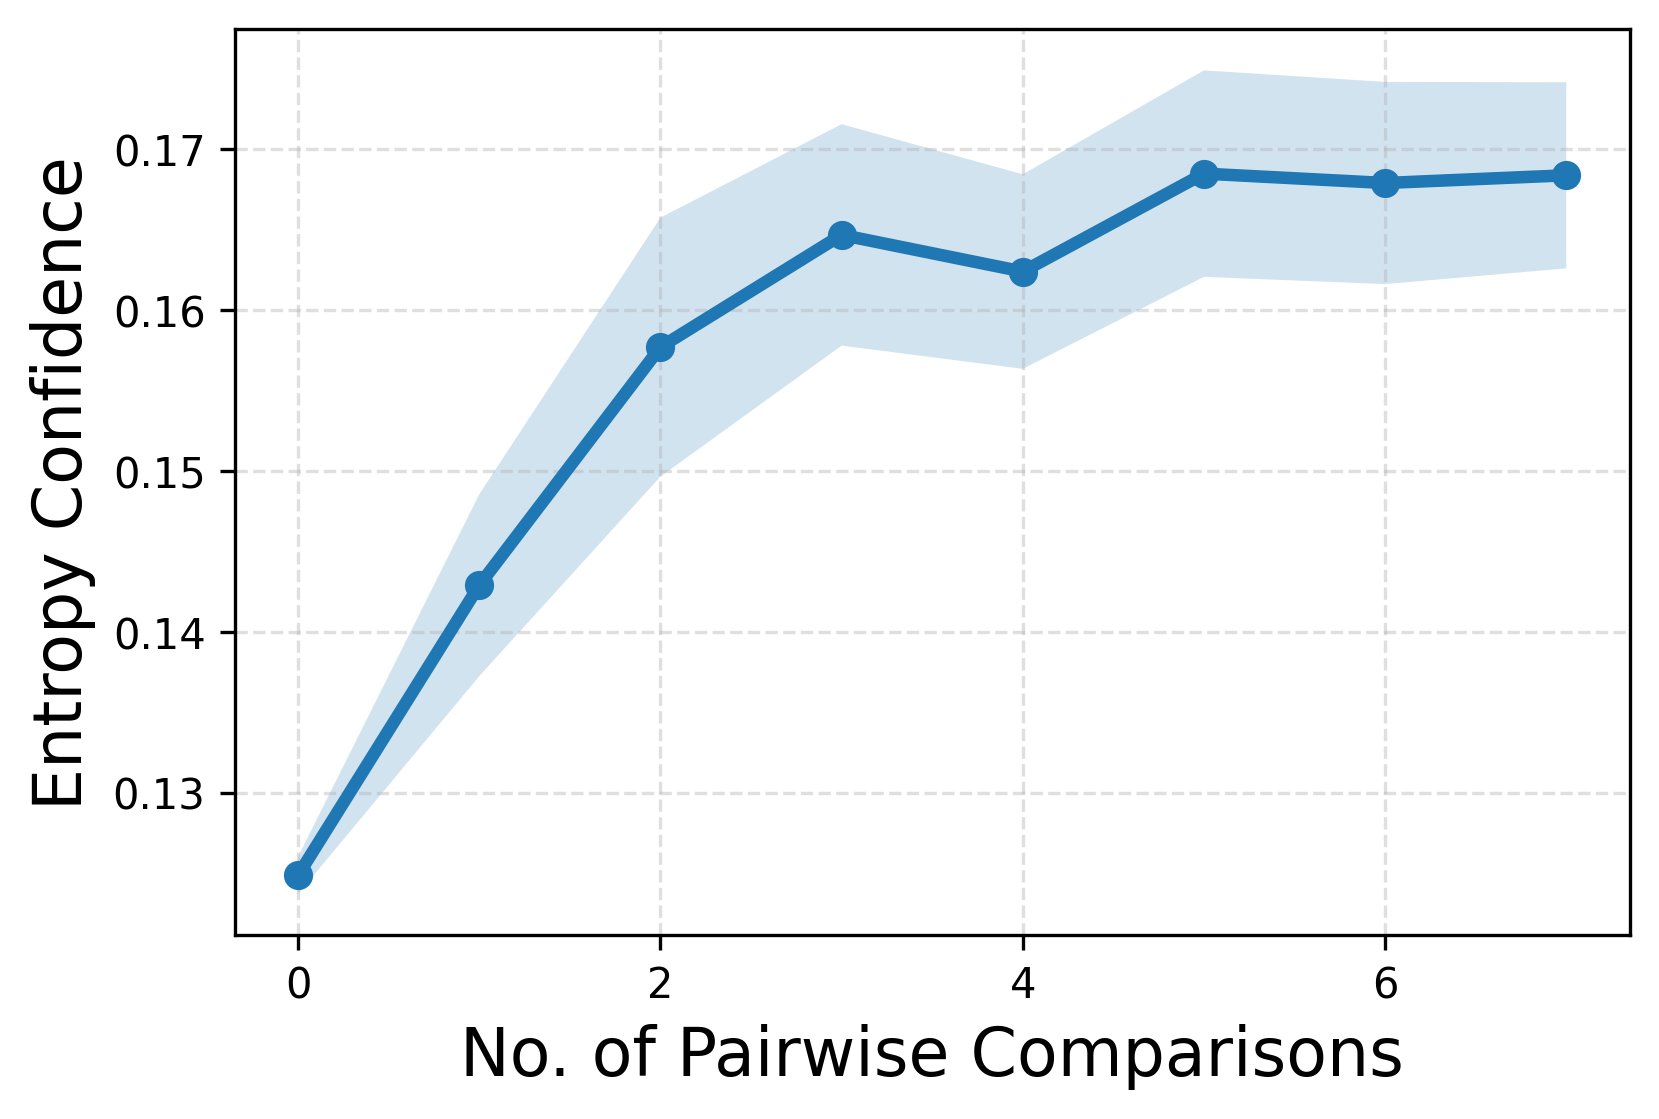

In [20]:
entropy = np.load("toy_example_comparison_entropyConf_add_different_comparison/entropyConv_all_experiments.npy", allow_pickle=True)
#entropy_same_demo = np.load("demo_entropyConf_same_demo/entropyConv_all_experiments.npy", allow_pickle=True)
num_demos = len(entropy[0])

conf_entropy = [i for i in entropy]
#conf_entropy_same_demo = [i for i in entropy_same_demo]

print(len(conf_entropy))

x_values = list(range(num_demos))
# Organize data by keys
entropy_crite = {i:[] for i in range(num_demos)}
for entry in conf_entropy:
    for key in entry:
        entropy_crite[key].append(entry[key][0])

# Define x-values corresponding to the keys (0, 1, 2)
x_values = list(range(num_demos))

# Compute the mean for each key
true_info_means = [np.mean(entropy_crite[key]) for key in sorted(entropy_crite.keys())]
# Compute the standard error of the mean (SEM) for each key
true_info_stds = [np.std(entropy_crite[key]) / np.sqrt(len(entropy_crite[key])) for key in sorted(entropy_crite.keys())]

# Create the plot
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(x_values, true_info_means, marker='o', linestyle='-', label="Entropy Confidence", linewidth=3, markersize=6)
plt.fill_between(x_values,
                 np.array(true_info_means) - np.array(true_info_stds),
                 np.array(true_info_means) + np.array(true_info_stds),
                 alpha=0.2)


plt.xticks(x_values[::2])
plt.xlabel("No. of Pairwise Comparisons",fontsize=16)
plt.ylabel("Entropy Confidence", fontsize=16)
#plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("5_by_5_comparison_entropy_conf_std.jpeg", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
entropy = np.load("improvement_entropyConf_datagen2/entropyConv_all_experiments.npy", allow_pickle=True)
#entropy_same_demo = np.load("demo_entropyConf_same_demo/entropyConv_all_experiments.npy", allow_pickle=True)

conf_entropy = [i for i in entropy]
#conf_entropy_same_demo = [i for i in entropy_same_demo]

print(len(conf_entropy))

x_values = list(range(40))
# Organize data by keys
entropy_crite = {i:[] for i in range(40)}
for entry in conf_entropy:
    for key in entry:
        entropy_crite[key].append(entry[key][0])

# Define x-values corresponding to the keys (0, 1, 2)
x_values = list(range(40))

# Compute the mean for each key
true_info_means = [np.mean(entropy_crite[key]) for key in sorted(entropy_crite.keys())]
# Compute the standard error of the mean (SEM) for each key
true_info_stds = [np.std(entropy_crite[key]) / np.sqrt(len(entropy_crite[key])) for key in sorted(entropy_crite.keys())]



# Create the plot
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(x_values, true_info_means, marker='o', linestyle='-', label="Entropy Confidence", linewidth=3, markersize=6)
plt.fill_between(x_values,
                 np.array(true_info_means) - np.array(true_info_stds),
                 np.array(true_info_means) + np.array(true_info_stds),
                 alpha=0.2)


plt.xticks(x_values)
plt.xlabel("No. of Pairwise Comparisons", fontdict={'fontsize':15})
plt.ylabel("Entropy Confidence")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("toy_estop_entropy_conf_toy_std.jpeg", dpi=300, bbox_inches='tight')
plt.show()